# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [2]:
# Loading the data using Pandas
leads = pd.read_csv(r"C:\Users\91986\OneDrive\Desktop\Lead project\Lead Scoring Assignment\Leads.csv")
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 1. Inspect the dataframe


In [3]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there

def printinfo():
    temp=pd.DataFrame(index=leads.columns)
    temp["data_type"]=leads.dtypes
    temp["Null_values"]=round(((leads.isnull().sum()/len(leads))*100),2)
    temp["unique"]=leads.nunique()
    return temp

In [4]:
printinfo()

,data_type,Null_values,unique
Prospect ID,object,0.00,9240
Lead Number,int64,0.00,9240
Lead Origin,object,0.00,5
Lead Source,object,0.39,21
Do Not Email,object,0.00,2
Do Not Call,object,0.00,2
Converted,int64,0.00,2
TotalVisits,float64,1.48,41
Total Time Spent on Website,int64,0.00,1731
Page Views Per Visit,float64,1.48,114


In [5]:

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# no of rows and columns
leads.shape

(9240, 37)

## 1.3 Cleaning the dataframe

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [7]:
#Deleting the columns with having only one unique value hence cannot contribute in predicting a successful lead case
leads=leads.loc[:,leads.nunique()!=1]

In [8]:
printinfo()

,data_type,Null_values,unique
Prospect ID,object,0.00,9240
Lead Number,int64,0.00,9240
Lead Origin,object,0.00,5
Lead Source,object,0.39,21
Do Not Email,object,0.00,2
Do Not Call,object,0.00,2
Converted,int64,0.00,2
TotalVisits,float64,1.48,41
Total Time Spent on Website,int64,0.00,1731
Page Views Per Visit,float64,1.48,114


In [9]:
## Creating a for loop to go through coulmns and those having "select" lable

cols=list(leads.columns)
Check_for=['Select']


for i in range(len(cols)):
    if len(leads[cols[i]].isin(Check_for).unique())>1:
        print(leads[cols[i]])
        

0                          Select
1                          Select
2         Business Administration
3           Media and Advertising
4                          Select
                  ...            
9235       IT Projects Management
9236        Media and Advertising
9237      Business Administration
9238    Human Resource Management
9239      Supply Chain Management
Name: Specialization, Length: 9240, dtype: object
0              Select
1              Select
2              Select
3       Word Of Mouth
4               Other
            ...      
9235           Select
9236           Select
9237           Select
9238    Online Search
9239           Select
Name: How did you hear about X Education, Length: 9240, dtype: object
0               Select
1               Select
2       Potential Lead
3               Select
4               Select
             ...      
9235    Potential Lead
9236    Potential Lead
9237    Potential Lead
9238               NaN
9239    Potential Lead
Name: Lead 

#####  From above we can see we have 4 columns having select value.These are "Lead Profile","City","How did you hear about X Education","Specialization"

In [10]:
# Converting all the values to lower case
leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [12]:
# Replacing 'Select' with NaN 
leads = leads.replace('select',np.nan)

In [13]:
printinfo()

,data_type,Null_values,unique
Prospect ID,object,0.00,9240
Lead Number,int64,0.00,9240
Lead Origin,object,0.00,5
Lead Source,object,0.39,20
Do Not Email,object,0.00,2
Do Not Call,object,0.00,2
Converted,int64,0.00,2
TotalVisits,float64,1.48,41
Total Time Spent on Website,int64,0.00,1731
Page Views Per Visit,float64,1.48,114


In [14]:
# Removing all the columns that are no required and have 35% null values
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [15]:
printinfo()

,data_type,Null_values,unique
Prospect ID,object,0.00,9240
Lead Origin,object,0.00,5
Lead Source,object,0.39,20
Do Not Email,object,0.00,2
Do Not Call,object,0.00,2
Converted,int64,0.00,2
TotalVisits,float64,1.48,41
Total Time Spent on Website,int64,0.00,1731
Page Views Per Visit,float64,1.48,114
Last Activity,object,1.11,17


 We are going to replace the NaN values with 'Missing_data' as it is huge data to impute. This way we have all the data and almost no null values

In [16]:
leads['Specialization'].fillna("Missing_data", inplace = True)
leads['Specialization'].value_counts()

Missing_data                         3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [17]:
leads['What is your current occupation'].fillna("Missing_data", inplace = True)
leads['What is your current occupation'].value_counts()

unemployed              5600
Missing_data            2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
leads['Country'].fillna("Missing_data", inplace = True)
leads['Country'].value_counts()

india                   6492
Missing_data            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [19]:
leads['What matters most to you in choosing a course'].fillna("Missing_data", inplace = True)
leads['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
Missing_data                 2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
leads["Country"].value_counts()

india                   6492
Missing_data            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [21]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "Missing_data":
        category = "Missing_data"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:slots(x['Country']), axis = 1)
leads['Country'].value_counts()

india            6492
Missing_data     2461
outside india     287
Name: Country, dtype: int64

In [22]:
# Checking the percent of lose if the null values are removed
round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

1.48

In [23]:
leads = leads[leads.isnull().sum(axis=1) <1]

In [24]:

round(100*(leads.shape[0])/(leads.shape[0]),2)

100.0

In [25]:
# Rechecking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [26]:
# Removing Id values since they are unique for everyone
leads = leads.drop('Prospect ID',1)
leads.shape

(9074, 21)

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [27]:
printinfo()

,data_type,Null_values,unique
Lead Origin,object,0.0,4
Lead Source,object,0.0,20
Do Not Email,object,0.0,2
Do Not Call,object,0.0,2
Converted,int64,0.0,2
TotalVisits,float64,0.0,41
Total Time Spent on Website,int64,0.0,1717
Page Views Per Visit,float64,0.0,114
Last Activity,object,0.0,17
Country,object,0.0,3


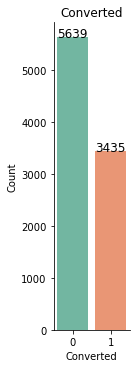

In [28]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leads, palette="Set2",aspect=0.4);

plt.title('Converted', fontsize = 12)
plt.xlabel("Converted", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()

#### From the above graph, there has been a overall conversion rate of around 65%

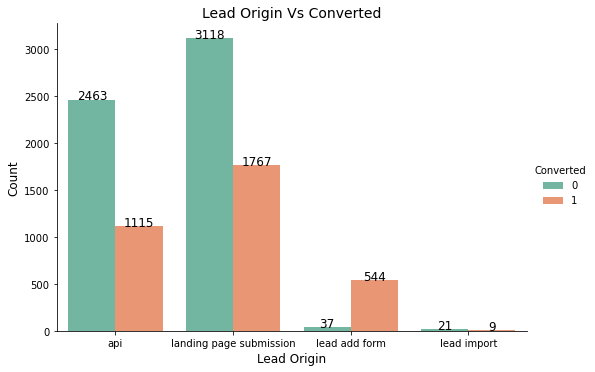

In [29]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leads, palette="Set2", aspect= 1.5);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()

#### From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission

posx and posy should be finite values
posx and posy should be finite values


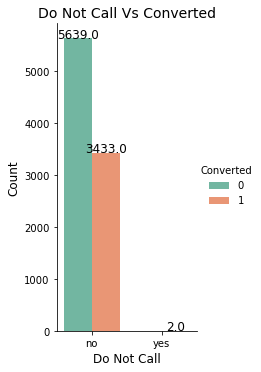

In [30]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()

#### From the above graph , it can be noticed that major conversions happened when calls were made. from here we can observe that feature does not provide much insight 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


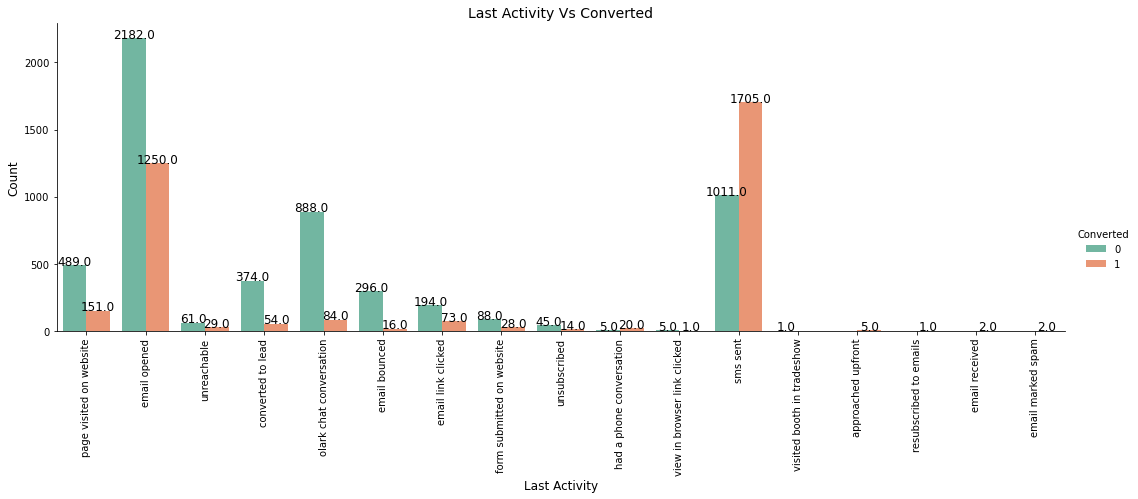

In [31]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()

#### As per the above graph, last activity value of 'SMS Sent' had more conversion

posx and posy should be finite values
posx and posy should be finite values


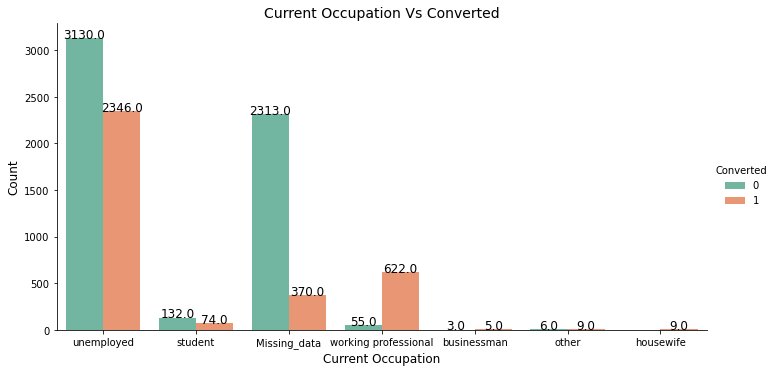

In [32]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leads, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()

#### More conversion happend with people who are unemployed. It can also be noticed from the above data that

#### Out of 4 business men, 2 got converted
#### Out 3 housewives, all 3 leads got converted.

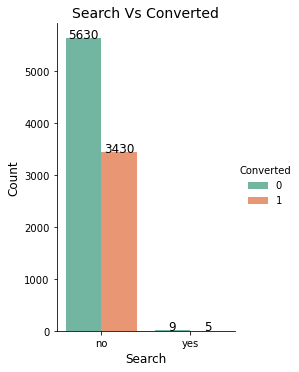

In [33]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()


#### Does not provide any insight so we can drop this column

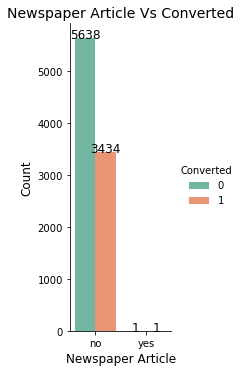

In [34]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()

#### Since "Newspaper Article" column now has only one value for all rows in "YES" , it is safe to drop this column

posx and posy should be finite values
posx and posy should be finite values


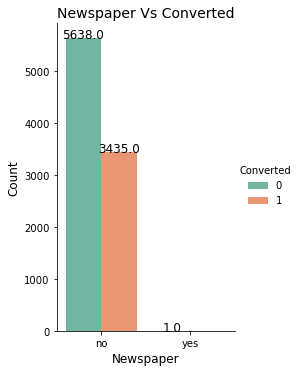

In [35]:
# Newspaper
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()


#### Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

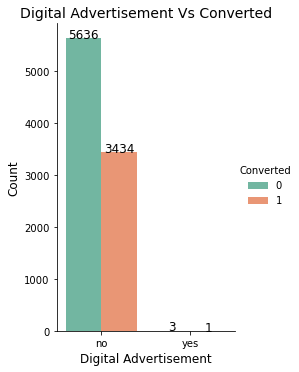

In [36]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()


#### It can be noticed above that there were 4 leads that came from digital advertisement of which one lead got converted

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


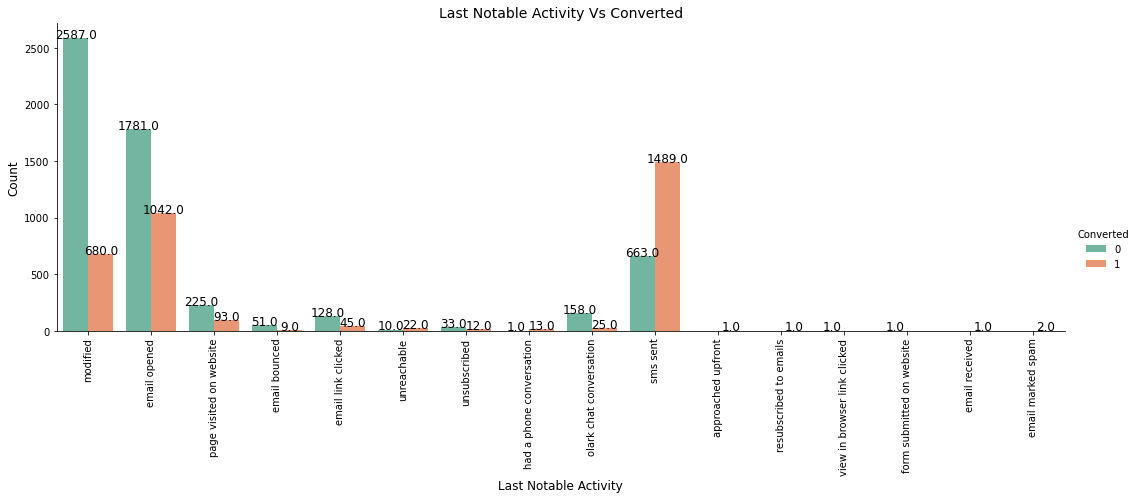

In [37]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leads, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),ha='center',fontsize=12)
    
plt.show()

#### It can be noticed that the conversion rate is high for "SMS Sent"

### 2.1.1. Numerical Variables

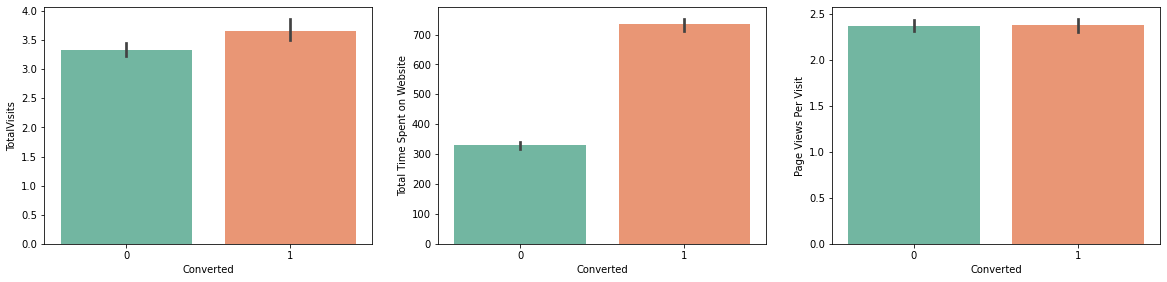

In [38]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

#### The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

#### 2.1.1. Numerical Variables

### 2.1. Relating all the categorical variables to Converted

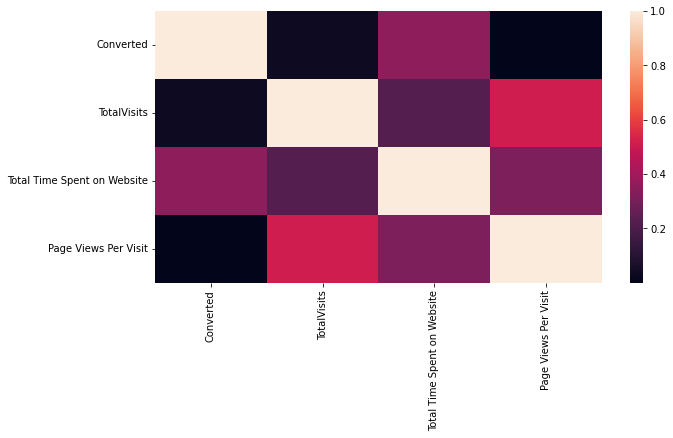

In [39]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

### Outliers

In [40]:
# Checking outliers at 05%,10%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.05,0.1,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000


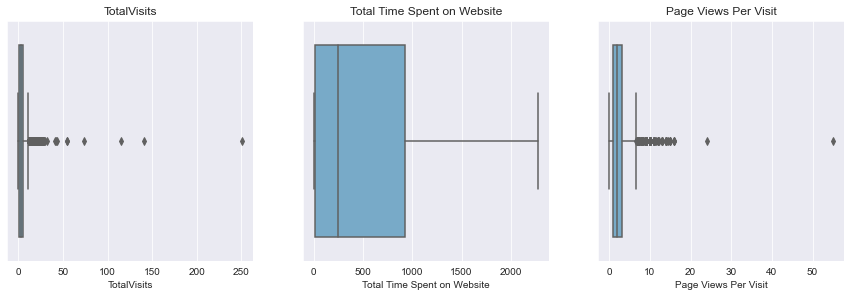

In [41]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(15,15))
plt.tight_layout()
sns.set_style('darkgrid')
#sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=12)
    sns.boxplot(x=leads[col[i]],data=leads,palette="Blues")  # using boxplot

#### We can see from earlier data that after 99th percentile there seems to be an outlier in all the 3 numeric variable. So we will perform the treatment on it

In [42]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


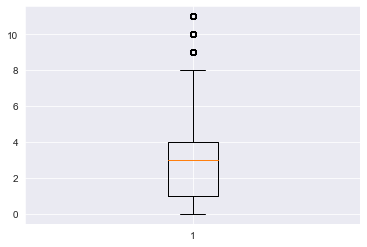

In [43]:
# redefining upper fence and lower fence
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['TotalVisits'])
plt.show()

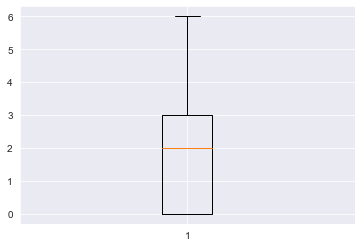

In [44]:
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

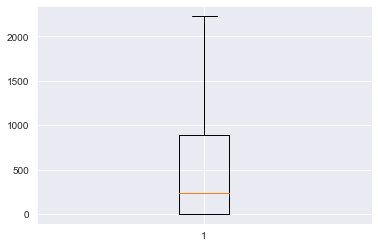

In [45]:
Q1 = leads['Total Time Spent on Website'].quantile(0.25)
Q3 = leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

In [46]:
# Checking outliers at 05%,10%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.05,0.1,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8511.000000,8511.000000,8511.000000,8511.000000
mean,0.376571,2.820115,470.957114,2.083354
std,0.484554,2.434611,542.451785,1.652724
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,234.000000,2.000000
75%,1.000000,4.000000,893.500000,3.000000
90%,1.000000,6.000000,1366.000000,4.000000
95%,1.000000,7.000000,1551.000000,5.000000


## 3. Dummy Variables

In [47]:
printinfo()

,data_type,Null_values,unique
Lead Origin,object,0.0,4
Lead Source,object,0.0,20
Do Not Email,object,0.0,2
Do Not Call,object,0.0,2
Converted,int64,0.0,2
TotalVisits,float64,0.0,12
Total Time Spent on Website,int64,0.0,1680
Page Views Per Visit,float64,0.0,34
Last Activity,object,0.0,17
Country,object,0.0,3


In [48]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,Missing_data,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [51]:
leads= leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Test-Train Split

In [52]:
# Import the required library
from sklearn.model_selection import train_test_split

In [53]:
X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# Putting the target variable in y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [56]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
7235,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7569,0.181818,0.018868,0.333333,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3867,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3759,0.272727,0.432615,0.500000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2599,0.181818,0.115903,0.333333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


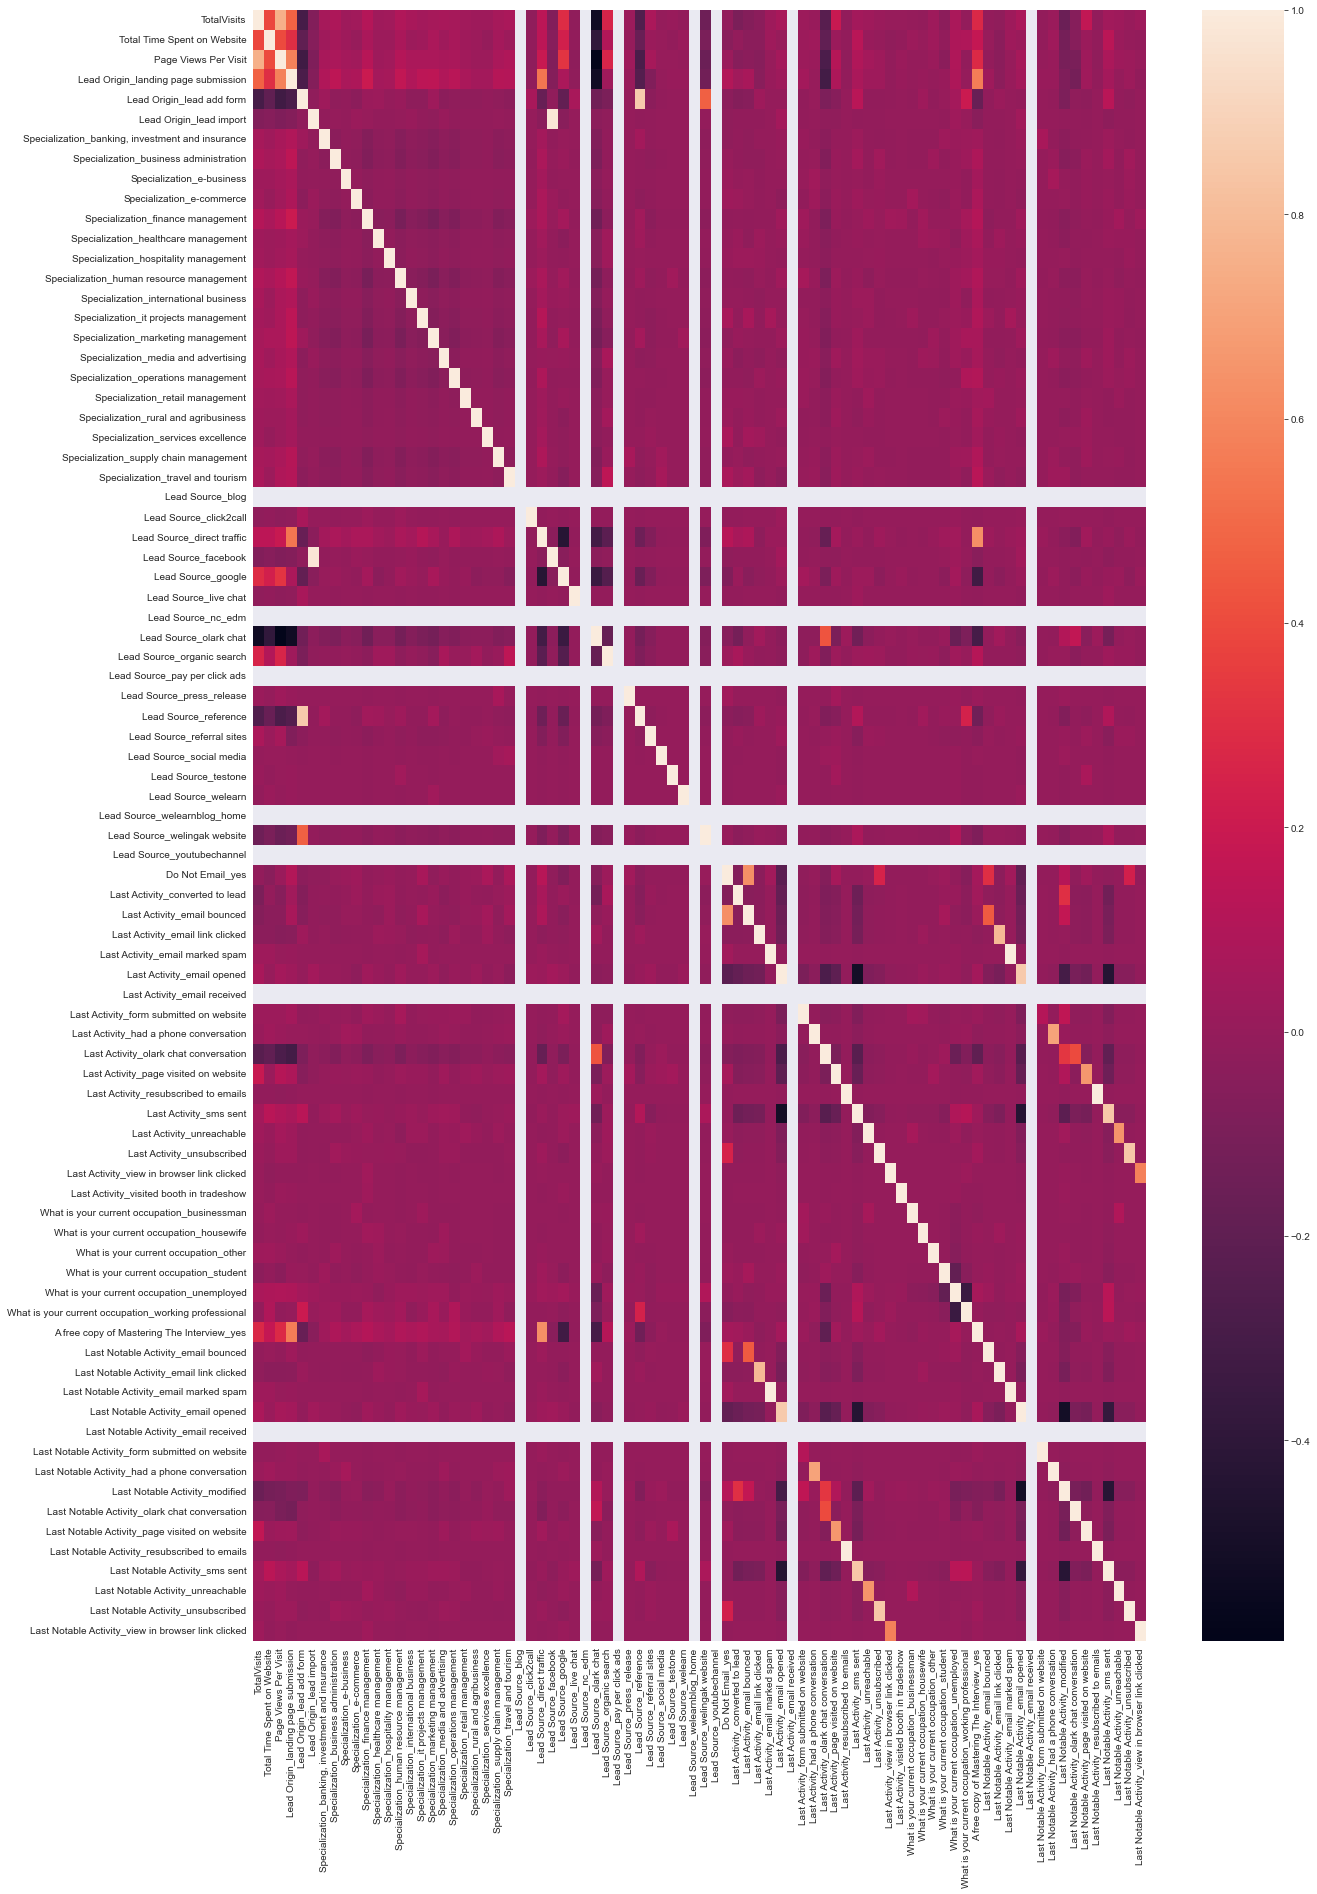

In [57]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

IT is very difficult to extract information from this graph so we will do RFE to select feature's

## 5. Model Building 

In [58]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
# Import RFE
from sklearn.feature_selection import RFE

In [60]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)           # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [61]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_landing page submission', False, 32),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 51),
 ('Specialization_banking, investment and insurance', False, 20),
 ('Specialization_business administration', False, 31),
 ('Specialization_e-business', False, 19),
 ('Specialization_e-commerce', False, 27),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 24),
 ('Specialization_hospitality management', False, 41),
 ('Specialization_human resource management', False, 25),
 ('Specialization_international business', False, 36),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 23),
 ('Specialization_media and advertising', False, 39),
 ('Specialization_operations management', False, 29),
 ('Specialization_retail management', False, 40),
 ('Specia

In [62]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [63]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [64]:
# Importing statsmodels
import statsmodels.api as sm

In [65]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5957
Model:                            GLM   Df Residuals:                     5941
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.8
Date:                Sat, 10 Sep 2022   Deviance:                       5033.6
Time:                        08:15:52   Pearson chi2:                 5.99e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3777
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3607      0.079     -4.590      0.000      -0.515      -0.207
Total Time Spent on Website                              3.7706      0.147     25.640      0.000       3.482       4.059
Lead Origin_lead add form                                3.6212      0.234     15.451      0.000       3.162       4.081
Lead Source_direct traffic                              -0.4881      0.080     -6.104      0.000      -0.645      -0.331
Lead Source_welingak website                             2.4524      1.037      2.365      0.018       0.420       4.485
Do Not Email_yes                                        -1.3477      0.201     -6.689      0.000      -1.743      -0.953
Last Activity_email bounced                             -1.1543      0.394     -2.931      0.003      -1.926      -0.382
Last Activity_had a phone conversation                   2.9778      1.288      2.312      0.021       0.454       5.502
Last Activity_olark chat conversation                   -0.8236      0.189     -4.359      0.000      -1.194      -0.453
What is your current occupation_housewife               22.9042   1.72e+04      0.001      0.999   -3.38e+04    3.38e+04
What is your current occupation_working professional     2.8878      0.197     14.683      0.000       2.502       3.273
Last Notable Activity_email link clicked                -1.6775      0.277     -6.055      0.000      -2.221      -1.135
Last Notable Activity_email opened                      -1.3870      0.090    -15.357      0.000      -1.564      -1.210
Last Notable Activity_modified                          -1.7980      0.097    -18.465      0.000      -1.989      -1.607
Last Notable Activity_olark chat conversation           -1.3540      0.371     -3.653      0.000      -2.081      -0.628
Last Notable Activity_page visited on website           -1.7083      0.222     -7.691      0.000      -2.144      -1.273
========================================================================================================================
"""

In [66]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_yes,1.81
12,Last Notable Activity_modified,1.77
5,Last Activity_email bounced,1.76
7,Last Activity_olark chat conversation,1.69
0,Total Time Spent on Website,1.55
1,Lead Origin_lead add form,1.48
2,Lead Source_direct traffic,1.43
3,Lead Source_welingak website,1.33
13,Last Notable Activity_olark chat conversation,1.31
11,Last Notable Activity_email opened,1.30


In [68]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [69]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5957
Model:                            GLM   Df Residuals:                     5942
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.8
Date:                Sat, 10 Sep 2022   Deviance:                       5043.5
Time:                        08:17:16   Pearson chi2:                 6.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3605      0.079     -4.589      0.000      -0.514      -0.207
Total Time Spent on Website                              3.7707      0.147     25.661      0.000       3.483       4.059
Lead Origin_lead add form                                3.6340      0.234     15.519      0.000       3.175       4.093
Lead Source_direct traffic                              -0.4885      0.080     -6.115      0.000      -0.645      -0.332
Lead Source_welingak website                             2.4360      1.037      2.349      0.019       0.403       4.469
Do Not Email_yes                                        -1.3490      0.201     -6.695      0.000      -1.744      -0.954
Last Activity_email bounced                             -1.1546      0.394     -2.932      0.003      -1.926      -0.383
Last Activity_had a phone conversation                   2.9746      1.288      2.310      0.021       0.450       5.499
Last Activity_olark chat conversation                   -0.8275      0.189     -4.381      0.000      -1.198      -0.457
What is your current occupation_working professional     2.8838      0.197     14.663      0.000       2.498       3.269
Last Notable Activity_email link clicked                -1.6662      0.275     -6.052      0.000      -2.206      -1.127
Last Notable Activity_email opened                      -1.3809      0.090    -15.302      0.000      -1.558      -1.204
Last Notable Activity_modified                          -1.7940      0.097    -18.439      0.000      -1.985      -1.603
Last Notable Activity_olark chat conversation           -1.3502      0.371     -3.643      0.000      -2.077      -0.624
Last Notable Activity_page visited on website           -1.7081      0.222     -7.690      0.000      -2.143      -1.273
========================================================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_yes,1.81
11,Last Notable Activity_modified,1.77
5,Last Activity_email bounced,1.76
7,Last Activity_olark chat conversation,1.69
0,Total Time Spent on Website,1.55
1,Lead Origin_lead add form,1.48
2,Lead Source_direct traffic,1.43
3,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.31
10,Last Notable Activity_email opened,1.30


In [71]:
X_train.drop('Last Activity_had a phone conversation', axis = 1, inplace = True)

In [72]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5957
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.8
Date:                Sat, 10 Sep 2022   Deviance:                       5051.5
Time:                        08:18:01   Pearson chi2:                 6.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3556      0.078     -4.531      0.000      -0.509      -0.202
Total Time Spent on Website                              3.7749      0.147     25.710      0.000       3.487       4.063
Lead Origin_lead add form                                3.6371      0.234     15.542      0.000       3.178       4.096
Lead Source_direct traffic                              -0.4947      0.080     -6.195      0.000      -0.651      -0.338
Lead Source_welingak website                             2.4260      1.037      2.340      0.019       0.394       4.458
Do Not Email_yes                                        -1.3390      0.201     -6.647      0.000      -1.734      -0.944
Last Activity_email bounced                             -1.1704      0.394     -2.973      0.003      -1.942      -0.399
Last Activity_olark chat conversation                   -0.8386      0.189     -4.442      0.000      -1.209      -0.469
What is your current occupation_working professional     2.8823      0.197     14.661      0.000       2.497       3.268
Last Notable Activity_email link clicked                -1.6707      0.275     -6.067      0.000      -2.210      -1.131
Last Notable Activity_email opened                      -1.3852      0.090    -15.356      0.000      -1.562      -1.208
Last Notable Activity_modified                          -1.7881      0.097    -18.419      0.000      -1.978      -1.598
Last Notable Activity_olark chat conversation           -1.3446      0.371     -3.628      0.000      -2.071      -0.618
Last Notable Activity_page visited on website           -1.7127      0.222     -7.711      0.000      -2.148      -1.277
========================================================================================================================
"""

In [73]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Do Not Email_yes,1.81
10,Last Notable Activity_modified,1.77
5,Last Activity_email bounced,1.76
6,Last Activity_olark chat conversation,1.69
0,Total Time Spent on Website,1.54
1,Lead Origin_lead add form,1.48
2,Lead Source_direct traffic,1.43
3,Lead Source_welingak website,1.33
11,Last Notable Activity_olark chat conversation,1.31
9,Last Notable Activity_email opened,1.30


In [74]:
X_train.drop('Lead Source_welingak website', axis = 1, inplace = True)

In [75]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5957
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.3
Date:                Sat, 10 Sep 2022   Deviance:                       5062.6
Time:                        08:18:42   Pearson chi2:                 6.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3747
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3550      0.078     -4.528      0.000      -0.509      -0.201
Total Time Spent on Website                              3.7746      0.147     25.710      0.000       3.487       4.062
Lead Origin_lead add form                                3.9837      0.226     17.653      0.000       3.541       4.426
Lead Source_direct traffic                              -0.4950      0.080     -6.201      0.000      -0.651      -0.339
Do Not Email_yes                                        -1.3156      0.199     -6.612      0.000      -1.706      -0.926
Last Activity_email bounced                             -1.1648      0.388     -3.005      0.003      -1.924      -0.405
Last Activity_olark chat conversation                   -0.8357      0.189     -4.427      0.000      -1.206      -0.466
What is your current occupation_working professional     2.8750      0.197     14.608      0.000       2.489       3.261
Last Notable Activity_email link clicked                -1.6776      0.276     -6.080      0.000      -2.218      -1.137
Last Notable Activity_email opened                      -1.3866      0.090    -15.384      0.000      -1.563      -1.210
Last Notable Activity_modified                          -1.7914      0.097    -18.474      0.000      -1.981      -1.601
Last Notable Activity_olark chat conversation           -1.3341      0.368     -3.624      0.000      -2.056      -0.613
Last Notable Activity_page visited on website           -1.7089      0.221     -7.721      0.000      -2.143      -1.275
========================================================================================================================
"""

In [76]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Do Not Email_yes,1.81
9,Last Notable Activity_modified,1.77
4,Last Activity_email bounced,1.76
5,Last Activity_olark chat conversation,1.69
0,Total Time Spent on Website,1.54
2,Lead Source_direct traffic,1.43
10,Last Notable Activity_olark chat conversation,1.31
8,Last Notable Activity_email opened,1.30
6,What is your current occupation_working profes...,1.14
1,Lead Origin_lead add form,1.12


In [77]:
X_train.drop('Last Activity_email bounced', axis = 1, inplace = True)

In [78]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5957
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.4
Date:                Sat, 10 Sep 2022   Deviance:                       5072.8
Time:                        08:20:34   Pearson chi2:                 6.11e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3736
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3501      0.078     -4.469      0.000      -0.504      -0.197
Total Time Spent on Website                              3.7676      0.147     25.710      0.000       3.480       4.055
Lead Origin_lead add form                                4.0147      0.227     17.722      0.000       3.571       4.459
Lead Source_direct traffic                              -0.4911      0.080     -6.158      0.000      -0.647      -0.335
Do Not Email_yes                                        -1.6444      0.176     -9.343      0.000      -1.989      -1.299
Last Activity_olark chat conversation                   -0.8187      0.189     -4.339      0.000      -1.188      -0.449
What is your current occupation_working professional     2.8644      0.196     14.597      0.000       2.480       3.249
Last Notable Activity_email link clicked                -1.6823      0.276     -6.090      0.000      -2.224      -1.141
Last Notable Activity_email opened                      -1.3911      0.090    -15.443      0.000      -1.568      -1.215
Last Notable Activity_modified                          -1.8098      0.097    -18.738      0.000      -1.999      -1.621
Last Notable Activity_olark chat conversation           -1.3523      0.368     -3.673      0.000      -2.074      -0.631
Last Notable Activity_page visited on website           -1.6951      0.222     -7.641      0.000      -2.130      -1.260
========================================================================================================================
"""

In [79]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_modified,1.73
4,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.54
2,Lead Source_direct traffic,1.43
9,Last Notable Activity_olark chat conversation,1.31
7,Last Notable Activity_email opened,1.30
5,What is your current occupation_working profes...,1.14
3,Do Not Email_yes,1.13
1,Lead Origin_lead add form,1.12
10,Last Notable Activity_page visited on website,1.04


All the VIF values are good and all the p-values are below 0.05. So we can fix model.

## 6. Creating Prediction

In [80]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7235    0.413346
7569    0.051780
3867    0.103403
3759    0.370501
2599    0.142388
9090    0.149159
4532    0.736812
2532    0.155793
8235    0.080212
2247    0.466125
dtype: float64

In [81]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41334607, 0.05178026, 0.10340254, 0.37050084, 0.14238822,
       0.14915948, 0.7368125 , 0.15579347, 0.08021202, 0.46612478])

In [82]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.413346
1,0,0.051780
2,0,0.103403
3,1,0.370501
4,0,0.142388


In [83]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.413346,0
1,0,0.051780,0
2,0,0.103403,0
3,1,0.370501,0
4,0,0.142388,0


## 7. Model Evaluation

In [84]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [85]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3342,  403],
       [ 795, 1417]], dtype=int64)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3342      403
# churn             795      1417

In [86]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.798892059761625

### That's around 80% accuracy with is a very good value

In [87]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [88]:
# Calculating the sensitivity
TP/(TP+FN)

0.6405967450271248

In [89]:
# Calculating the specificity
TN/(TN+FP)

0.8923898531375167

### With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 64% and specificity of around 89%.

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [90]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

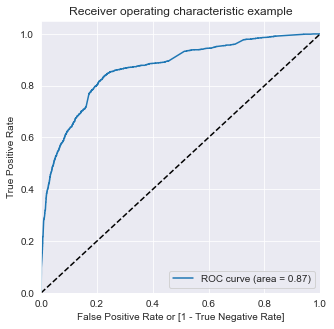

In [92]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The area under ROC curve is 0.87 which is a very good value.

In [93]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.413346,0,1,1,1,1,1,0,0,0,0,0
1,0,0.051780,0,1,0,0,0,0,0,0,0,0,0
2,0,0.103403,0,1,1,0,0,0,0,0,0,0,0
3,1,0.370501,0,1,1,1,1,0,0,0,0,0,0
4,0,0.142388,0,1,1,0,0,0,0,0,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.371328,1.000000,0.000000
0.1,0.1,0.529125,0.979204,0.263284
0.2,0.2,0.755246,0.870705,0.687049
0.3,0.3,0.796542,0.836799,0.772764
0.4,0.4,0.805103,0.774412,0.823231
0.5,0.5,0.798892,0.640597,0.892390
0.6,0.6,0.795870,0.562387,0.933778
0.7,0.7,0.783784,0.487342,0.958879
0.8,0.8,0.764143,0.406872,0.975167
0.9,0.9,0.724694,0.272152,0.991989


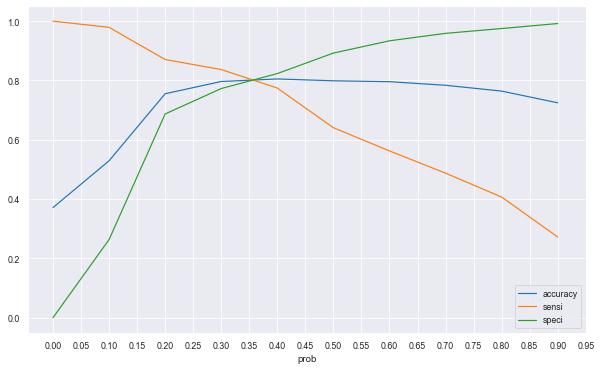

In [98]:
sns.set_style("darkgrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the graph it is visible that the optimal cut off is at 0.36

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.413346,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.051780,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.103403,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.370501,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.142388,0,1,1,0,0,0,0,0,0,0,0,0


In [100]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8019137149571932

In [101]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3011,  734],
       [ 446, 1766]], dtype=int64)

In [102]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Calculating the sensitivity
TP/(TP+FN)

0.798372513562387

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.8040053404539386

#### With the current cut off as 0.36 we have accuracy, sensitivity and specificity of around 80%.

## 8. Prediction on Test set

In [105]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [106]:
# Substituting all the columns in the final train model
col = X_train.columns

In [107]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Do Not Email_yes,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
8511,1.0,0.289757,0,0,0,0,0,0,0,1,0,0
1496,1.0,0.173854,0,1,0,0,0,0,1,0,0,0
664,1.0,0.064690,0,0,0,0,0,0,0,1,0,0
5079,1.0,0.226415,0,1,0,0,0,0,1,0,0,0
4116,1.0,0.415094,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8743,1.0,0.000000,0,0,0,0,0,0,0,0,0,0
4262,1.0,0.000000,0,0,0,0,0,0,1,0,0,0
5502,1.0,0.037287,0,0,0,0,1,0,0,0,0,0
5417,1.0,0.477987,0,1,1,0,0,0,0,1,0,0


In [108]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.255728
1,0,0.171184
2,0,0.128280
3,0,0.201132
4,1,0.936259


In [109]:
# Making prediction using cut off 0.36
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.255728,0
1,0,0.171184,0
2,0,0.128280,0
3,0,0.201132,0
4,1,0.936259,1
...,...,...,...
2549,1,0.413346,1
2550,0,0.149159,0
2551,1,0.934300,1
2552,0,0.076237,0


In [110]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8144087705559906

In [111]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1273,  288],
       [ 186,  807]], dtype=int64)

In [112]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [113]:
# Calculating the sensitivity
TP/(TP+FN)

0.8126888217522659

In [114]:
# Calculating the specificity
TN/(TN+FP)

0.8155028827674567

#### With the current cut off as 0.36 we have accuracy, sensitivity and specificity of around 81%.

## 9. Precision-Recall

In [115]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3342,  403],
       [ 795, 1417]], dtype=int64)

In [116]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7785714285714286

In [117]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6405967450271248

#### With the current cut off as 0.36 we have Precision around 78% and Recall around 64%

### 9.1. Precision and recall tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 5952    0
 5953    1
 5954    1
 5955    1
 5956    1
 Name: Converted, Length: 5957, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5952    0
 5953    1
 5954    1
 5955    1
 5956    1
 Name: Predicted, Length: 5957, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

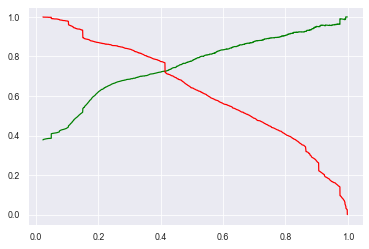

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.413346,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.051780,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.103403,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.370501,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.142388,0,1,1,0,0,0,0,0,0,0,0,0


In [123]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8062783280174585

In [124]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3100,  645],
       [ 509, 1703]], dtype=int64)

In [125]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [126]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.725298126064736

In [127]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7698915009041591

#### With the current cut off as 0.41 we have Precision around 72.5% and Recall around 77%

Important point to be noted from the outcomes for precision and recall score -

Our precison percentage is 72.5% approximately and recall percentage is 77%
This means we have very good model which explains relevancy of 72.5% and true relevant results about 77%.
As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.

## 10. Prediction on Test set

In [128]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.255728
1,0,0.171184
2,0,0.128280
3,0,0.201132
4,1,0.936259


In [129]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.255728,0
1,0,0.171184,0
2,0,0.128280,0
3,0,0.201132,0
4,1,0.936259,1
...,...,...,...
2549,1,0.413346,1
2550,0,0.149159,0
2551,1,0.934300,1
2552,0,0.076237,0


In [130]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8132341425215348

In [131]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1304,  257],
       [ 220,  773]], dtype=int64)

In [132]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [133]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7504854368932039

In [134]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7784491440080564

#### With the current cut off as 0.41 we have Precision around 75% and Recall around 77% 

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Lead Origin- lead add form
3.	Lead Source_direct traffic
4.  Do Not Email_yes
5.  Last Activity_olark chat conversation
6.  What is your current occupation_working profession
7.  Last Notable Activity_email link clicked
8.  Last Notable Activity_email opened
9.  Last Notable Activity_modified
10. Last Notable Activity_olark chat conversation
11. Last Notable Activity_page visited on website
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.

.